# Assignment 2

**Problem 1.** We want to build a 1-hidden-layer neural network for two-classification problem. Implement the layer_size() function to define the size of each layer.
<br />
**Hint:**
1. The network has one input layer, one hidden layer and one output layer
2. Size of input layer= size of each sample; size of hidden layer (up to you); size of output layer = 1.


In [57]:
def layer_size(X,Y,hidden_size):
    '''
    X: input dataset (shape: n*m_samples) ！不一定为方阵 ！
    Y : groud truth vector (1*n_samples)
    '''
    ###input size
    input_s= np.shape(X)[1]
    ###hidden size 
    hidden_s= hidden_size
    ###output size
    output_s= 1
    
    return input_s,hidden_s,output_s


**Problem 2.** Implement initialize() to initialize parameters in neural networks by using np.random.

In [53]:
def initialize(input_s,hidden_s,output_s):
    '''
    we need to initialize two sets of parameters:
    W1 -- weight matrix of shape (hidden_s, input_s)
    b1 -- bias vector of shape (hidden_s, 1)
    W2 -- weight matrix of shape (output_s, hidden_s)
    b2 -- bias vector of shape (output_s, 1)
    '''
    W1 = np.random.uniform(0,1,(hidden_s,input_s))
    b1 = np.random.uniform(0,1,(hidden_s,1))
    W2 = np.random.uniform(0,1,(output_s, hidden_s))
    b2 = np.random.uniform(0,1)
    
    params = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    
    return params


**Problem 3.** Implement forward()
<br >
**Hint:**
1. Given X and params
2. Calculate $H1=W1X+b1$; $A1=tanh(H1)$
3. Caculate $H2=W2A1+b2$;$A2=sigmoid(H2)$
4. Store H1,H2,A1,A2 in a dictionary and return


In [104]:
def forward(X,params):
    ###set parametes
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    ###calculate H1,A1
    ###your code
    H1 = np.dot(W1,X.T) + b1  # shape(n,n)
    A1 = np.tanh(H1) 
    ###calculate H2,A2
    ###your code
    H2 = np.dot(W2,A1) + b2 # shape(1,n)
    A2 = sigmoid(H2)
    ### store in dictionary
    out={'H1':H1,'A1':A1,'H2':H2,'A2':A2}
    
    
    return out

def sigmoid(x): # wrap a function to compute sigmoid
    return np.exp(x) / (1 + np.exp(x))


**Problem 4.** Implement backward()
1. The cost function is the same as logistic cost function in assignment 2
2. Calculate the gradients of W1,b1,W2,b2 
3. Store the gradients in a dictionary and return it
4. Avoid using 'for' when calculate the gradient

In [105]:
def backward(params,out,X,Y):
    '''
    calculate cost
    calculate gradients:
    dW1-- gradient of W1
    db1-- gradient of b1
    dW2-- gradient of b2
    db2-- gradient of b2
    
    '''
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    H1 = out['H1']
    A1 = out['A1']
    H2 = out['H2']
    A2 = out['A2']
    m = X.shape[1]
    ###calculate cost
    cost = (-1/m)*np.sum(Y * np.log(A2+1e-5) + (1 - Y) * (np.log(1-A2+1e-5))) # 提高浮点精度可以避免数字过小造成
                                                                              # 的溢出，并保证cost值存在
    
    ###calculate grad
    dH2 = A2 - Y
    dW2 = (1/m) * np.dot(dH2,A1.T) #要除以m的原因是，这里参数矩阵中的每一个参数都是m个样本对这个参数的影响之和
    db2 = (1/m) * np.sum(dH2,axis=1,keepdims=True)
    dH1 = np.multiply(np.dot(W2.T,dH2),1-np.power(A1,2))
    dW1 = (1/m) * np.dot(dH1,X)
    db1 = (1/m) * np.sum(dH1,axis=1,keepdims=True)
    ###store in dictionary
    grads = {'dW1':dW1,'db1':db1,'dW2':dW2,'db2':db2}
    return cost,grads



**Problem 5.** Implement optimize()


In [29]:
def optimize(params,grads,learning_rate=0.01):
    """
    update parameters and return them
    W1=W1-learning_rate*dw1
    """
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    W1 = W1 - learning_rate*grads['dW1']
    W2 = W2 - learning_rate*grads['dW2']
    b1 = b1 - learning_rate*grads['db1']
    b2 = b2 - learning_rate*grads['db2']
    params = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
    return params



**Problem 6.** Merge all the above functions into a model, implement model() function
1. Define the size of each layer
2. Initialze parameters
3. Forward propogation
4. Backward propogation
5. Update parameters
6. Return parameters

In [103]:
def model(X,Y,hidden_size,learning_rate,num_iterations):
    input_s,hidden_s,output_s = layer_size(X,Y,hidden_size)
    params = initialize(input_s,hidden_s,output_s)
    costs = []
    for i in range(num_iterations):
        out = forward(X,params)
        cost,grads = backward(params,out,X,Y)
        if cost != np.nan:
            costs.append(cost)
        if i % 1000 == 0:
            print("Cost after iteration ",i,"cost:",cost)
        if (abs(cost - costs[i-1]) <= 0.00001 and i > 0) or np.sum(costs == np.nan) >=50:
            # When testing the code, some cost kept nan 'cause the optimal solution had been reached 
            # or learning rate is too high, so add this breaking condition.
            if cost == np.nan:
                print("Cost turns to none!")
            break
        params = optimize(params,grads,learning_rate)
    return params,costs



**problem 7.** Implement predict() to predict the label.
<br />
**Hint:**
1. Use the learned params to calculate $A2$.
2. Convert the entries of $A2$ into 0 (if $A2$ <= 0.5) or 1 (if $A2$ > 0.5).
3. Store the results in pred\_Y and return it.


In [74]:
def predict(params,X):
    """
    return the predicted label of each sample
    """
    ###set parametes
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    ###calculate H1,A1
    ###your code
    H1 = np.dot(W1,X.T) + b1  # shape(n,n)
    A1 = np.tanh(H1) 
    ###calculate H2,A2
    ###your code
    H2 = np.dot(W2,A1) + b2 # shape(1,n)
    A2 = sigmoid(H2)
    ### pred_Y
    pred_Y = np.zeros(A2.shape)
    pred_Y[A2>0.5] = 1
    return pred_Y
    
    


**Problem 8.** 
1. Use the same dataset in assignment1 
2. Implement train_test_split() to split the dataset into training and test (remember Standardization). 
3. Use model() and training set to train a neural network.
4. Calculate accuracy in both training and test.
5. Test different values of learning rate. plot costs to compare their performance. 
6. Compare the performance of neural network to logistic regression(assignment 2)

In [81]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

def train_test_split(X,Y,ratio):
    train_x = X[:int(X.shape[0]*ratio),:]
    test_x = X[int(X.shape[0]*ratio):,:]
    train_y = Y[:int(X.shape[0]*ratio)]
    test_y = Y[int(X.shape[0]*ratio):]
    
    return train_x,train_y,test_x,test_y

cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
train_x,train_y,test_x,test_y = train_test_split(X,Y,0.7)
train_x,test_x = standardization(train_x),standardization(test_x)
num = 10000
params,costs = model(train_x,train_y,int(X.shape[0]/2),0.05,num)
pred_train_Y = predict(params,train_x)
pred_test_Y = predict(params,test_x)
train_accuracy = np.mean(pred_train_Y == train_y)
test_accuracy = np.mean(pred_test_Y == test_y)
print('train_accuracy=',train_accuracy)
print('test_accuracy=',test_accuracy)
###use different learning rate and plot the costs
###your code


<ipython-input-70-bcbe25dd0e97>:21: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m)*np.sum(Y * np.log(A2) + (1 - Y) * (np.log(1-A2)))
<ipython-input-70-bcbe25dd0e97>:21: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m)*np.sum(Y * np.log(A2) + (1 - Y) * (np.log(1-A2)))


Cost after iteration  0 cost: nan
Cost after iteration  1000 cost: 0.15113639600593148
train_accuracy= 0.9974874371859297
test_accuracy= 0.8771929824561403


Cost after iteration  0 cost: 136.34748961619687
Cost after iteration  1000 cost: 1.020232280869435
Cost after iteration  2000 cost: 0.6014346541996872
Cost after iteration  3000 cost: 0.5155658229295599
Cost after iteration  4000 cost: 0.4556364238375961
Cost after iteration  5000 cost: 0.33297687678286125
Cost after iteration  6000 cost: 0.2789697790952401
Cost after iteration  7000 cost: 0.2377675382751478
Cost after iteration  8000 cost: 0.20626622695318092
Cost after iteration  9000 cost: 0.18265603501083452
Cost after iteration  0 cost: 135.77881951015922
Cost after iteration  1000 cost: 0.5964837056290326
Cost after iteration  2000 cost: 0.46423278340882534
Cost after iteration  3000 cost: 0.3917309880090234
Cost after iteration  4000 cost: 0.33035823138577286
Cost after iteration  5000 cost: 0.2903233361694015
Cost after iteration  6000 cost: 0.268200459890605
Cost after iteration  7000 cost: 0.25414019807996346
Cost after iteration  0 cost: 136.01574929202565
Cost after iterat

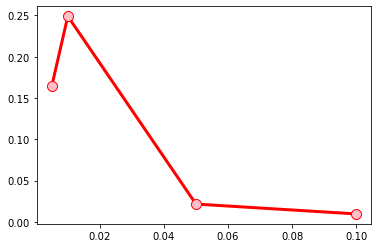

In [106]:
import matplotlib.pyplot as plt
rates = [0.005,0.01,0.05,0.1]
costls = []
num = 10000
for rate in rates:
    params,costs = model(train_x,train_y,int(X.shape[0]/2),rate,num)
    costls.append(costs[-1])
plt.plot(rates,costls,linewidth = 3,color = 'r',marker = 'o',markerfacecolor='pink',markersize=10)
plt.show()
# According to the result, the cost is none when rate is more than 0.05